In [1]:
import tensorflow as tf
from numpy import *
import matplotlib.pyplot as plt

# Load the cover image and secret image
cover_image = tf.io.read_file("cover_image.jpg")
secret_image = tf.io.read_file("secret_image.jpg")

# Decode the images
cover_image = tf.image.decode_jpeg(cover_image)
secret_image = tf.image.decode_jpeg(secret_image)

# Resize the secret image to the same size as the cover image
secret_image = tf.image.resize(secret_image, tf.shape(cover_image)[:2])

# Normalize the images
cover_image = array(tf.image.per_image_standardization(cover_image))
secret_image = array(tf.image.per_image_standardization(secret_image))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


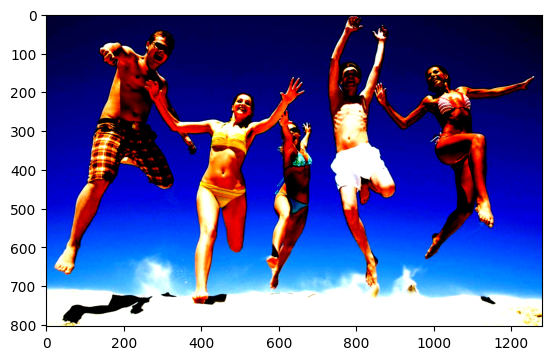

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


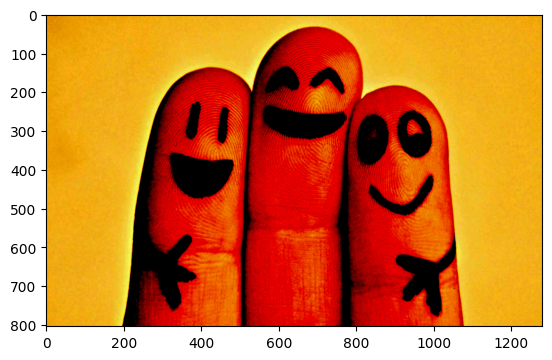

In [2]:
plt.imshow(cover_image)
plt.show()
plt.imshow(secret_image)
plt.show()

In [3]:
# Create the stego image by combining the cover image and secret image
stego_image = cover_image + secret_image
stego_image=array(stego_image)

# Encode the stego image and save it
stego_image = tf.image.encode_jpeg(stego_image)
tf.io.write_file("stego.jpg", stego_image)


In [4]:
# To extract the secret image
# Load the stego image
stego_image = tf.io.read_file("stego.jpg")
stego_image = tf.image.decode_jpeg(stego_image)
stego_image = array(tf.image.per_image_standardization(stego_image))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


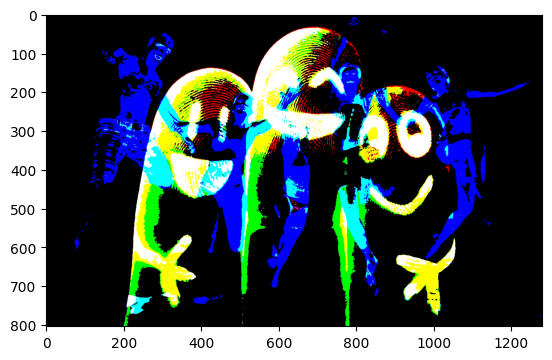

In [5]:
plt.imshow(stego_image)
plt.show()

In [6]:
# Extract the secret image by subtracting the cover image from the stego image
secret_image = stego_image - cover_image
cover_image=stego_image-secret_image

# Normalize the secret image
secret_image = array(tf.image.per_image_standardization(secret_image))
cover_image = array(tf.image.per_image_standardization(cover_image))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


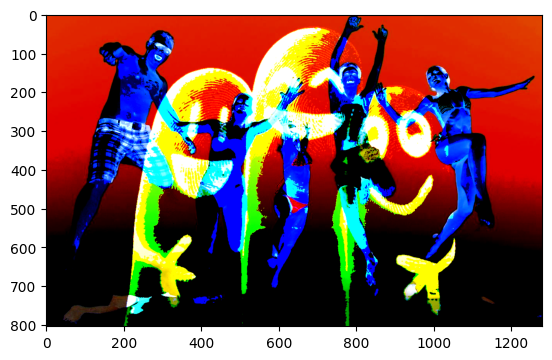

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


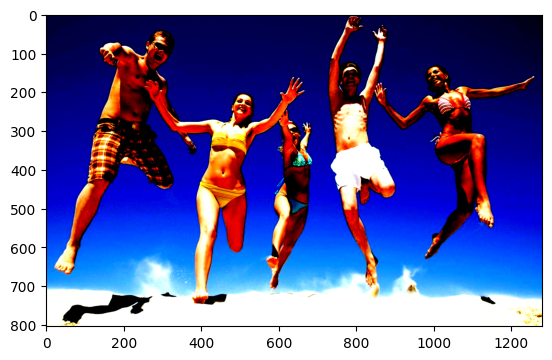

In [7]:
plt.imshow(secret_image)
plt.show()
plt.imshow(cover_image)
plt.show()

In [82]:
# Encode and save the secret image
secret_image = array(tf.image.encode_jpeg(secret_image))
tf.io.write_file("extracted_secret_image.jpg", secret_image)
